# 다변수 이산확률변수

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우에는 각각의 확률변수에 대한 확률분포 이외에도 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.
예를 들어 1부터 6까지의 값을 가지는 카테고리 분포 확률변수 $X$와 $Y$를 생각하자. 확률변수 각각의 확률적 특성은 확률질량함수(pmf) $ P_X(x), P_Y(y) $로 나타낼 수 있다. 확률질량함수의 아랫 첨자로 확률변수 이름을 지정하여 어떤 확률 변수의 확률밀도함수인지 표시한다.
확률밀도함수의 독립변수 $x$는 나타낼 수 있는 어떤 숫자, 종속변수 $P$는 그 숫자가 나타날 확률이다. 즉 $P_X(x=1)$ 또는 $P_X(1)$은 확률변수 $X$의 값이 1이 나올 확률이다.

## 결합 확률질량함수

이번에는 하나의 값이 아닌 두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우를 생각하자. 단변수 이산확률변수에서와 마찬가지로 하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면 임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있으므로 하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 **결합 확률질량함수(joint probability mass function)**이라고 하며 다음과 같이 표시한다.

$$ P_{XY}(x, y) $$

이 때는 나타날 수 있는 숫자가 두 숫자로 이루어진 쌍이므로 독립변수가 $x,y$ 두 개가 된다. 종속변수는 그 숫자 쌍이 나타날 확률이다. 즉, $P_{XY}(2, 3)$은 $\{x=2, y=3\}$이라는 특정한 숫자 쌍으로만 이루어진 사건의 확률이다.

예를 들어 어느 대학교에서 50명의 학생이 X, Y 두 과목에 대해 시험을 보고 그 결과가 A, B, C, D, E, F 학점으로 나왔다고 가정하자. 각 과목에 대해 

In [1]:
scores = np.array([[1, 2, 1, 0, 0, 0],
                   [0, 2, 3, 1, 0, 0],
                   [0, 4, 7, 4, 1, 0],
                   [0, 1, 4, 5, 4, 0],
                   [0, 0, 1, 3, 2, 0],
                   [0, 0, 0, 1, 2, 1]])

grades = ["A", "B", "C", "D", "E", "F"]
pd.DataFrame(scores, columns=grades, index=grades)

,A,B,C,D,E,F
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


결합 확률밀도함수는 다음과 같아진다.

In [2]:
pmf = scores / scores.sum()
pd.DataFrame(pmf, columns=grades, index=grades)

,A,B,C,D,E,F
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


이 확률 질량 함수를 히트맵으로 나타내면 아래와 같다.

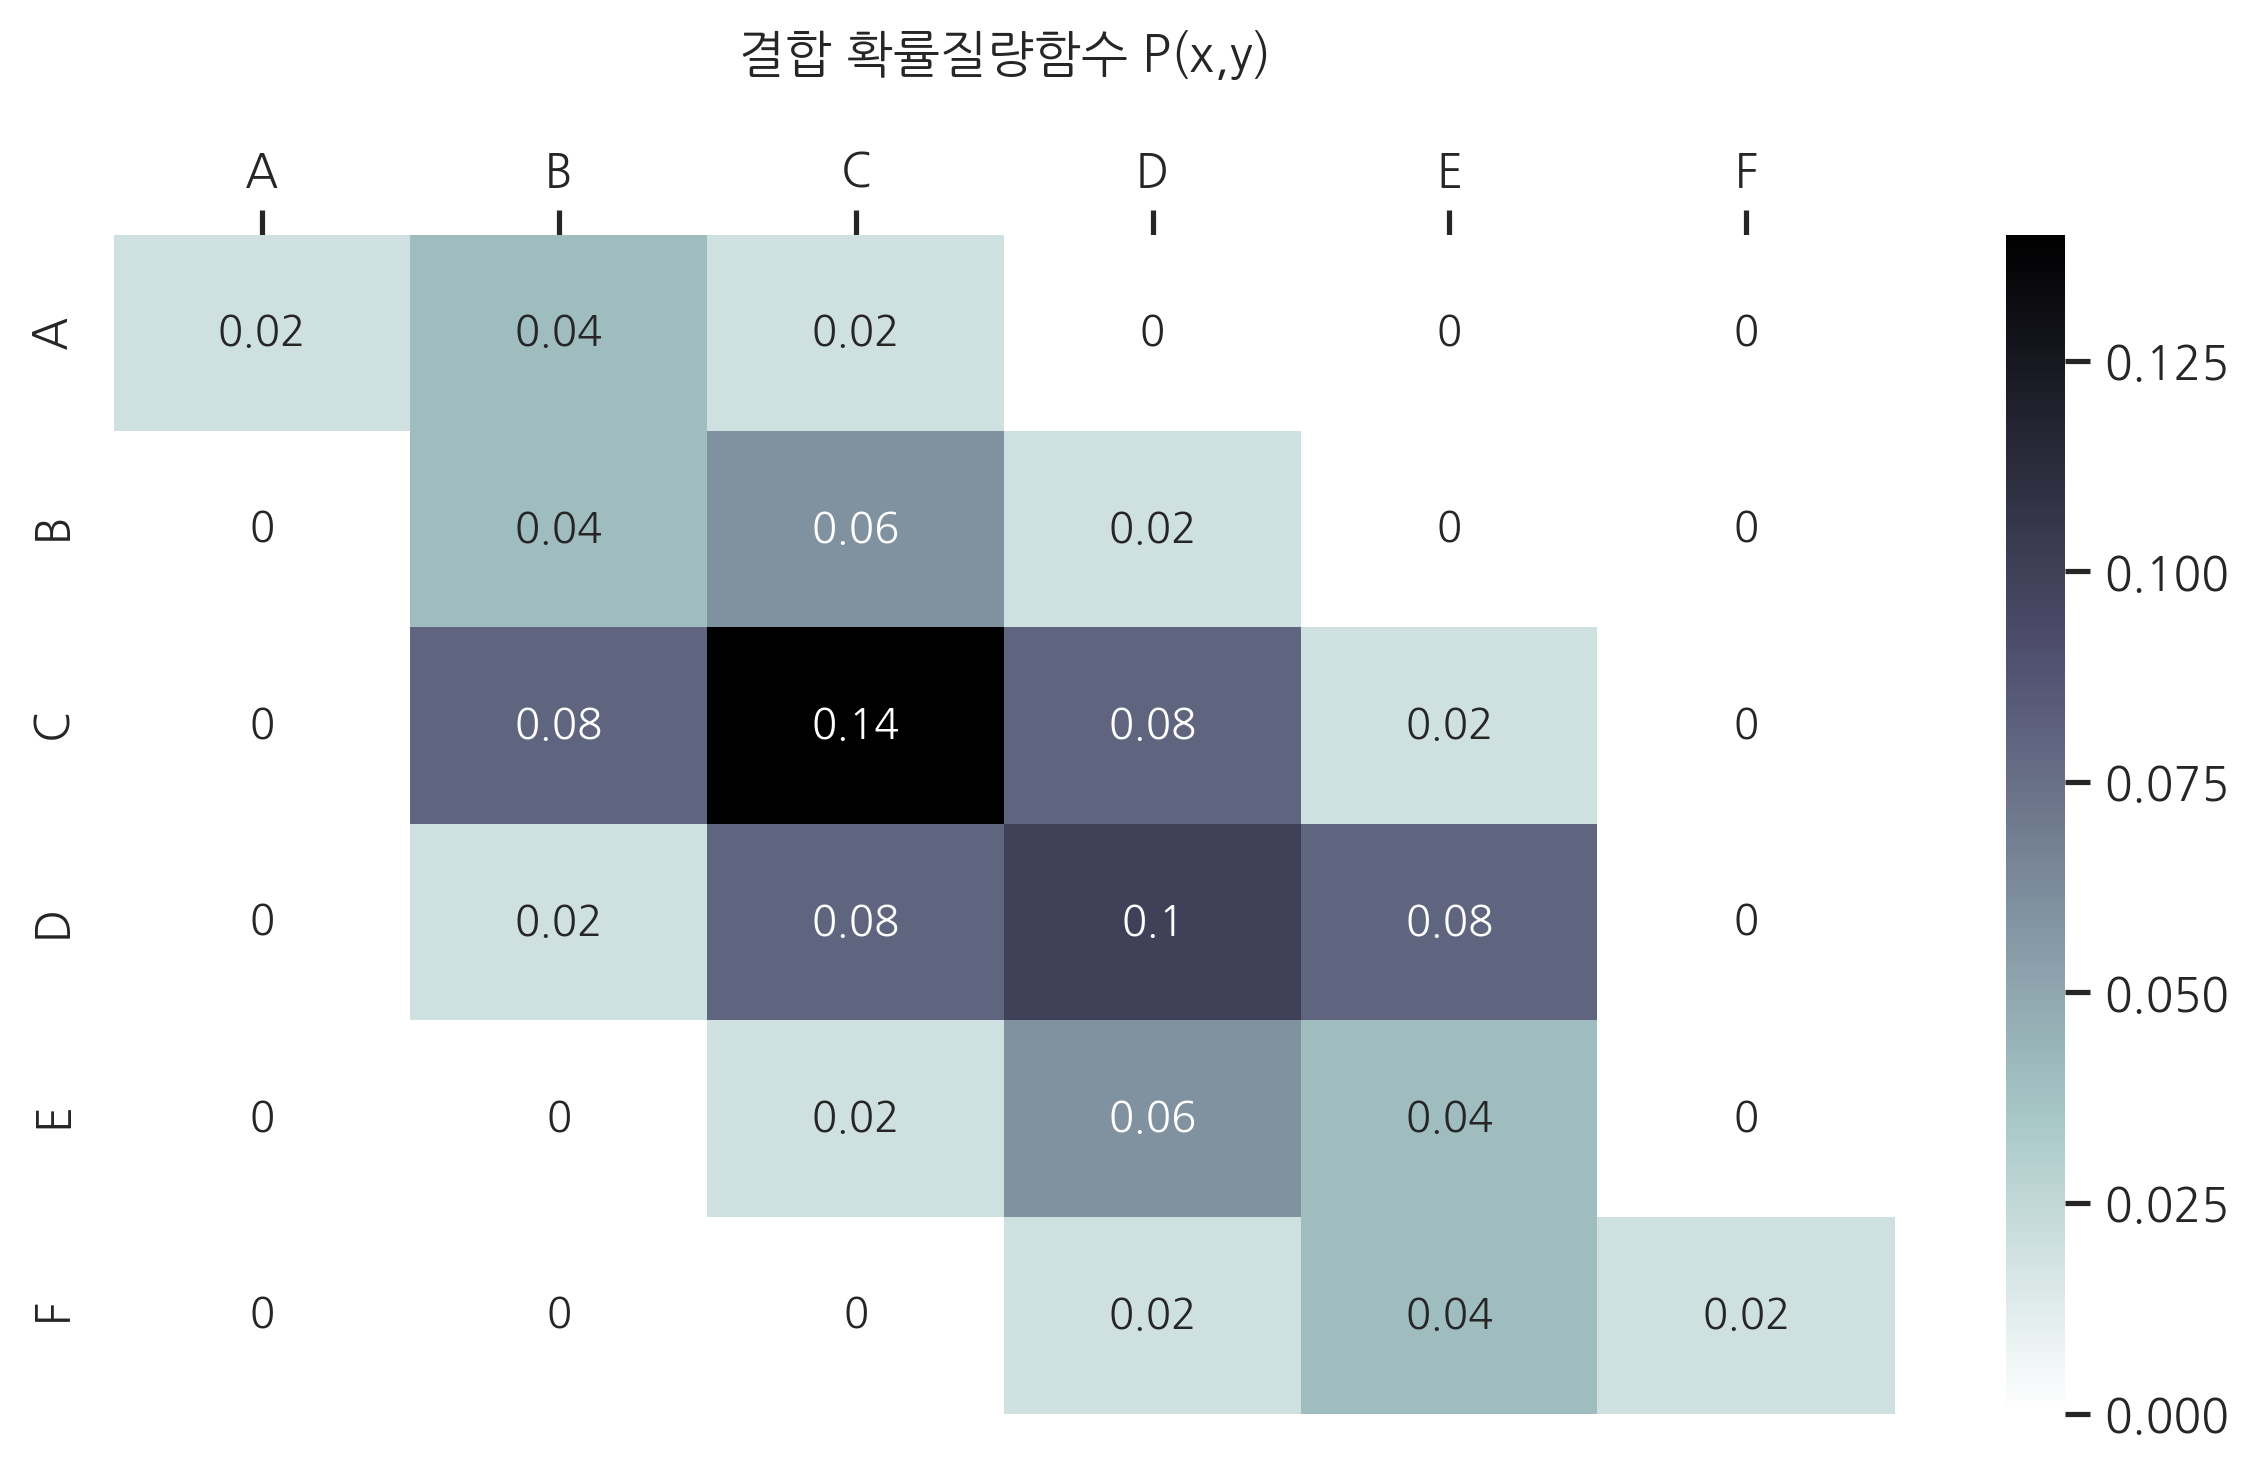

In [3]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
                 xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
                 yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
ax.xaxis.tick_top()
plt.title("결합 확률질량함수 P(x,y)\n")
plt.tight_layout()
plt.show()

#### 연습 문제 9.1.1

위에서 구한 데이터를 기준으로 다음 질문에 답하라.

1. 이 확률변수의 표본 값이 (D,F)일 확률을 구하라.
1. 이 확률변수의 표본 값이 (F,A)일 확률을 구하라.
1. 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가.

만약 $y$값이 특정한 값으로 고정되었다면 확률 질량 함수의 단면을 이용하여 다음과 같이 그릴 수도 있다.

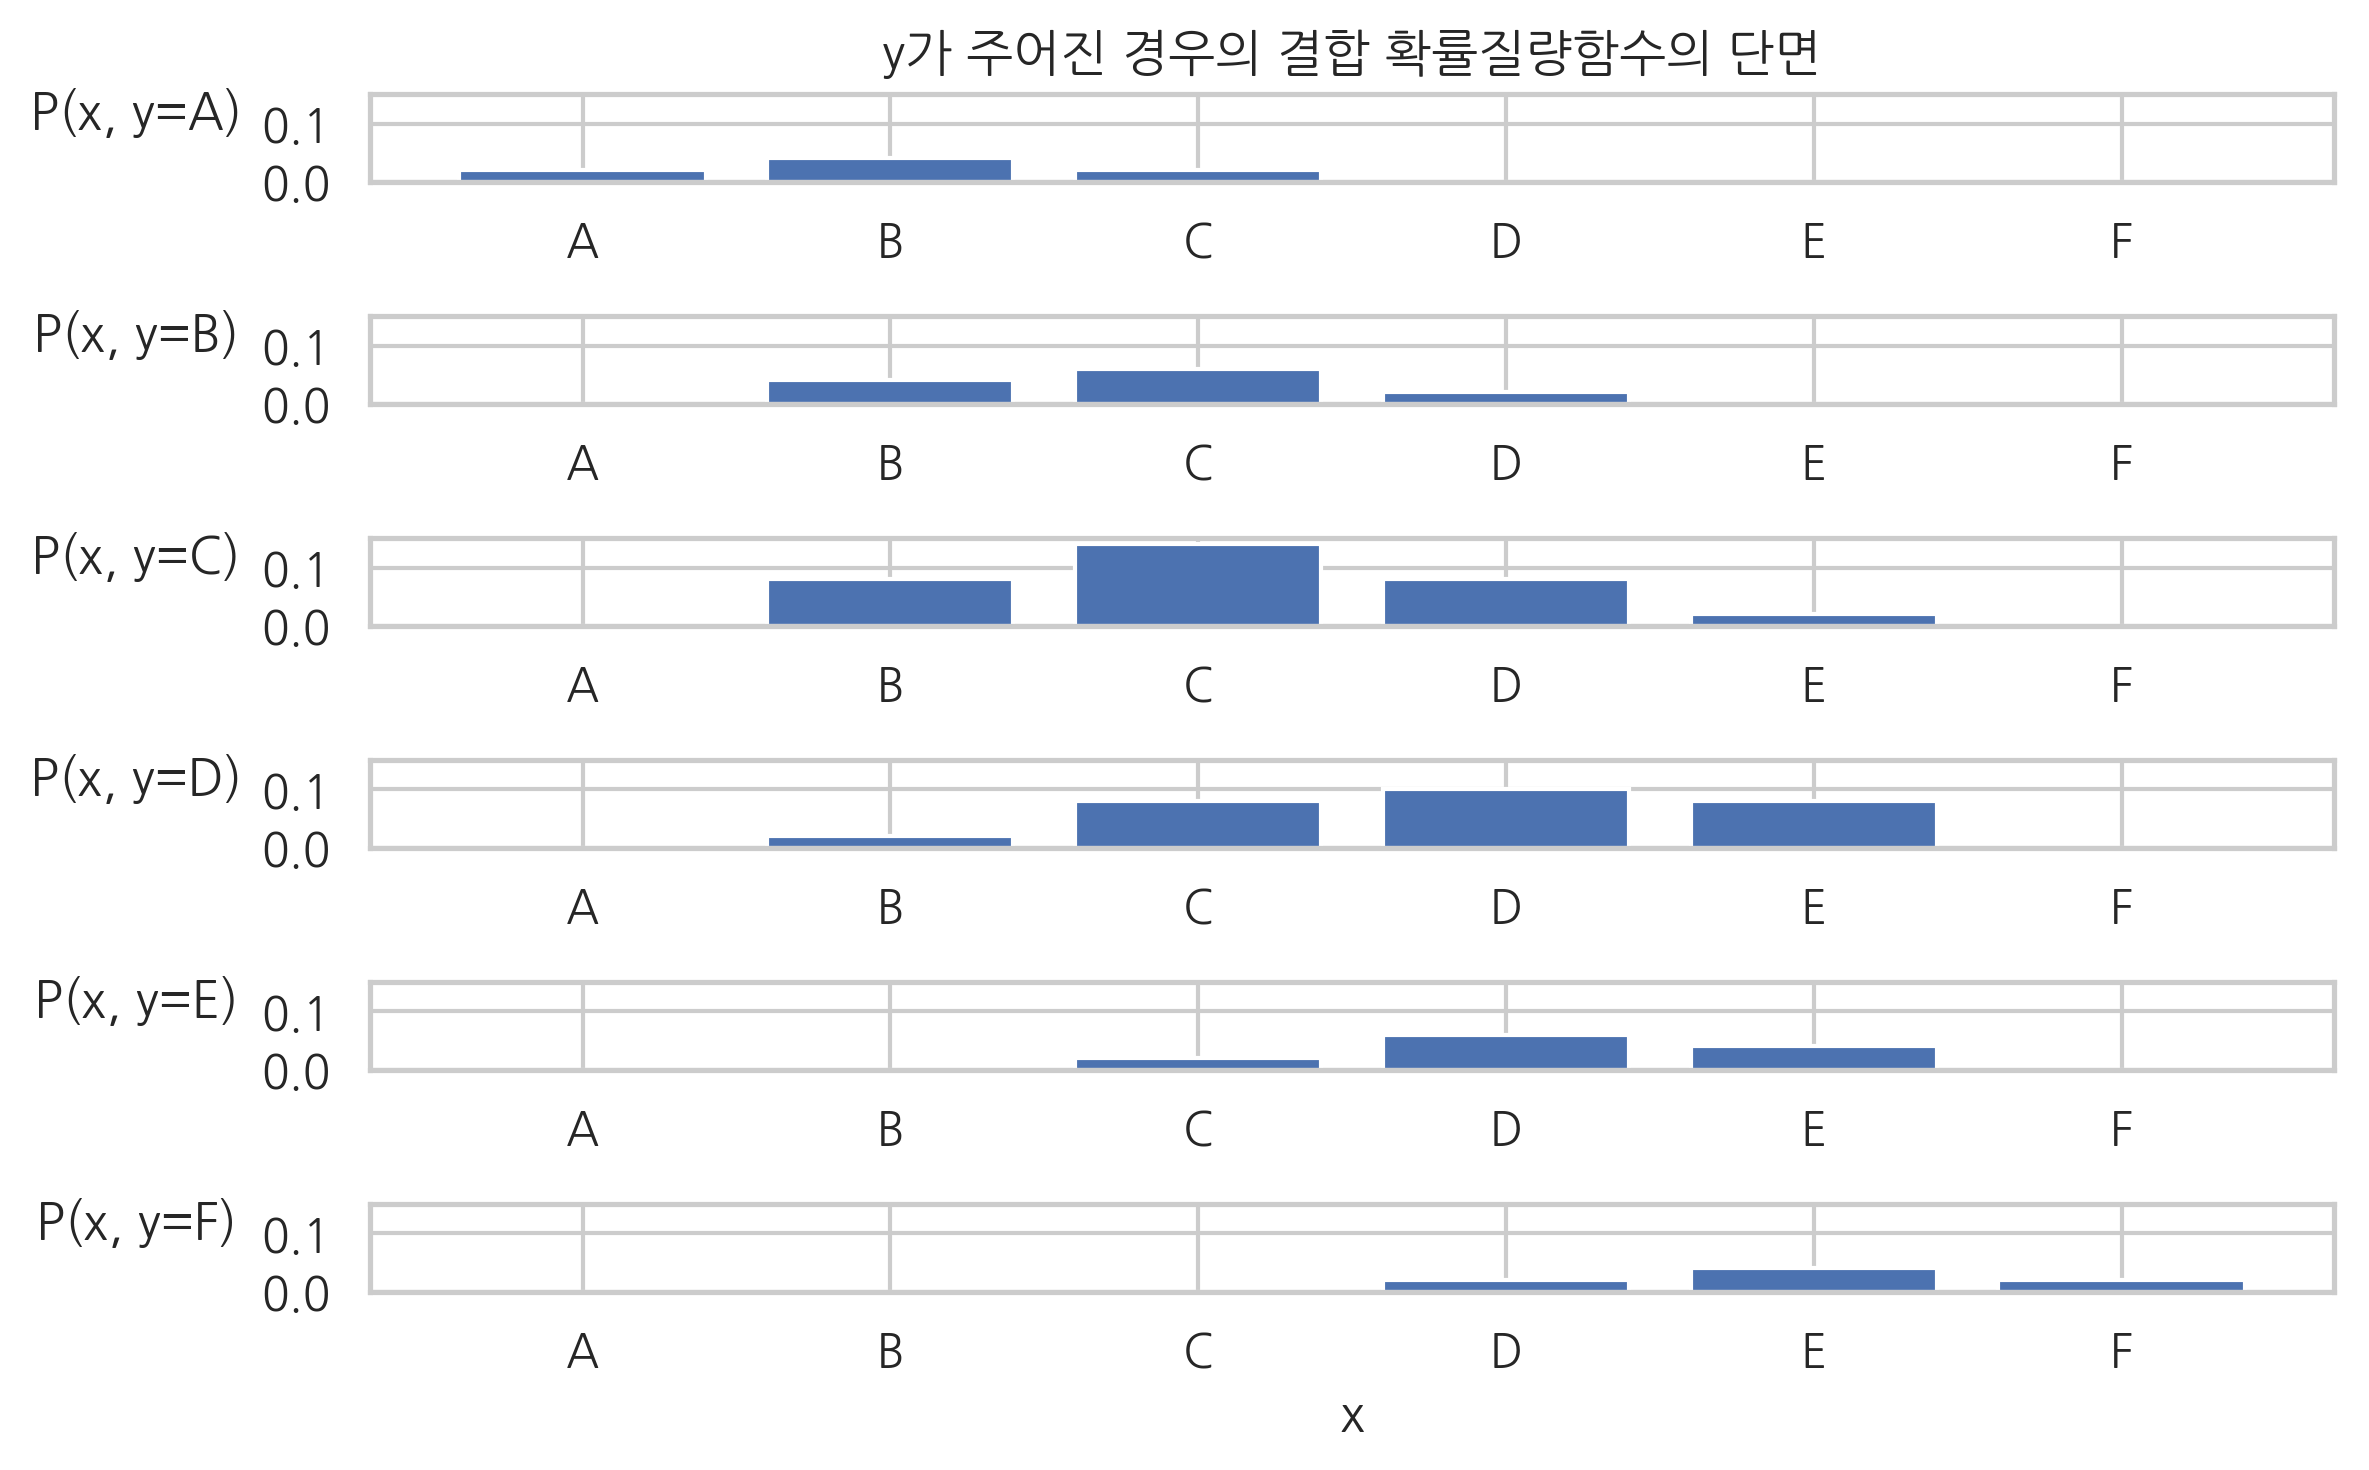

In [4]:
x = np.arange(6)
plt.subplot(611)
plt.bar(x, pmf[0, :])
plt.ylabel("P(x, y=A)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y가 주어진 경우의 결합 확률질량함수의 단면")
plt.subplot(612)
plt.bar(x, pmf[1, :])
plt.ylabel("P(x, y=B)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(613)
plt.bar(x, pmf[2, :])
plt.ylabel("P(x, y=C)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(614)
plt.bar(x, pmf[3, :])
plt.ylabel("P(x, y=D)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(615)
plt.bar(x, pmf[4, :])
plt.ylabel("P(x, y=E)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(616)
plt.bar(x, pmf[5, :])
plt.ylabel("P(x, y=F)", rotation=0, labelpad=30)
plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.xlabel("x")
plt.tight_layout()
plt.show()

#### 연습 문제 9.1.2

위에서 구한 데이터를 기준으로 다음 질문에 답하라.

1. 만약 확률 변수 $Y$의 값이 A가 나왔다면 확률 변수 $X$의 값은  어떤 값이 나올 가능성이 가장 높은가.
1. 만약 확률 변수 $Y$의 값이 C가 나왔다면 확률 변수 $X$의 값은  어떤 값이 나올 가능성이 가장 높은가.

## 주변 확률질량함수

**주변 확률질량함수(marginal probability mass function)**는 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수이다. 즉 다변수가 되기 이전의 단변수 확률질량함수를 말한다.

결합 확률질량함수에서 주변 확률질량함수를 구하려면 전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$$ 
\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} P_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} P_{XY}(x_i,y) \\
\end{align} 
$$

위에서 예로 든 이산 확률 변수의 경우에 과목 X만 관심이 있다면 결합 확률 질량 함수 $P_{XY}(x, y)$로부터 X에 대한 주변 확률 질량 함수 $P_X(x)$를 구해야 한다.

주변 확률 질량 함수를 계산한 값은 다음과 같다.

$$ P_X(A) = P_{XY}(A,A) + P_{XY}(A,B) + P_{XY}(A,C) + P_{XY}(A,D) + P_{XY}(A,E) + P_{XY}(A,F) = 0.02 $$ 


In [5]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([0.02, 0.18, 0.32, 0.28, 0.18, 0.02])

In [6]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

#### 연습 문제 9.1.3

위에서 구한 데이터를 기준으로 다음 질문에 답하라.

1. 확률변수 $Y$의 표본 값이 A일 확률을 구하라.
1. 확률변수 $X$의 표본 값이 B일 확률을 구하라.

## 조건부 확률질량함수

**조건부 확률질량함수(conditional probability mass function)**는 다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률질량함수를 말한다. 조건부 확률질량함수는 다음과 같이 정의된다.


$$ P_{X \mid Y}(x \mid y) = \dfrac{P_{XY}(x, y)}{P_{Y}(y)} $$

$$ P_{Y \mid X}(y \mid x) = \dfrac{P_{XY}(x, y)}{P_{X}(x)} $$


조건부 확률질량함수의 모양은 결합질량함수 $P_{XY}(x, y)$에서 $y$값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다. 다만 조건부 확률질량함수의 합은 1이 된다.

$y=A$일 때의 결합확률질량함수의 단면과 확률의 합은 다음과 같다.

In [7]:
pmf[0, :]

array([0.02, 0.04, 0.02, 0.  , 0.  , 0.  ])

In [8]:
np.sum(pmf[0, :])

0.08

$y=A$일 때의 조건부 확률질량함수와 확률의 합은 다음과 같다.

In [9]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0

array([0.25, 0.5 , 0.25, 0.  , 0.  , 0.  ])

In [10]:
np.sum(cond_y0)

1.0

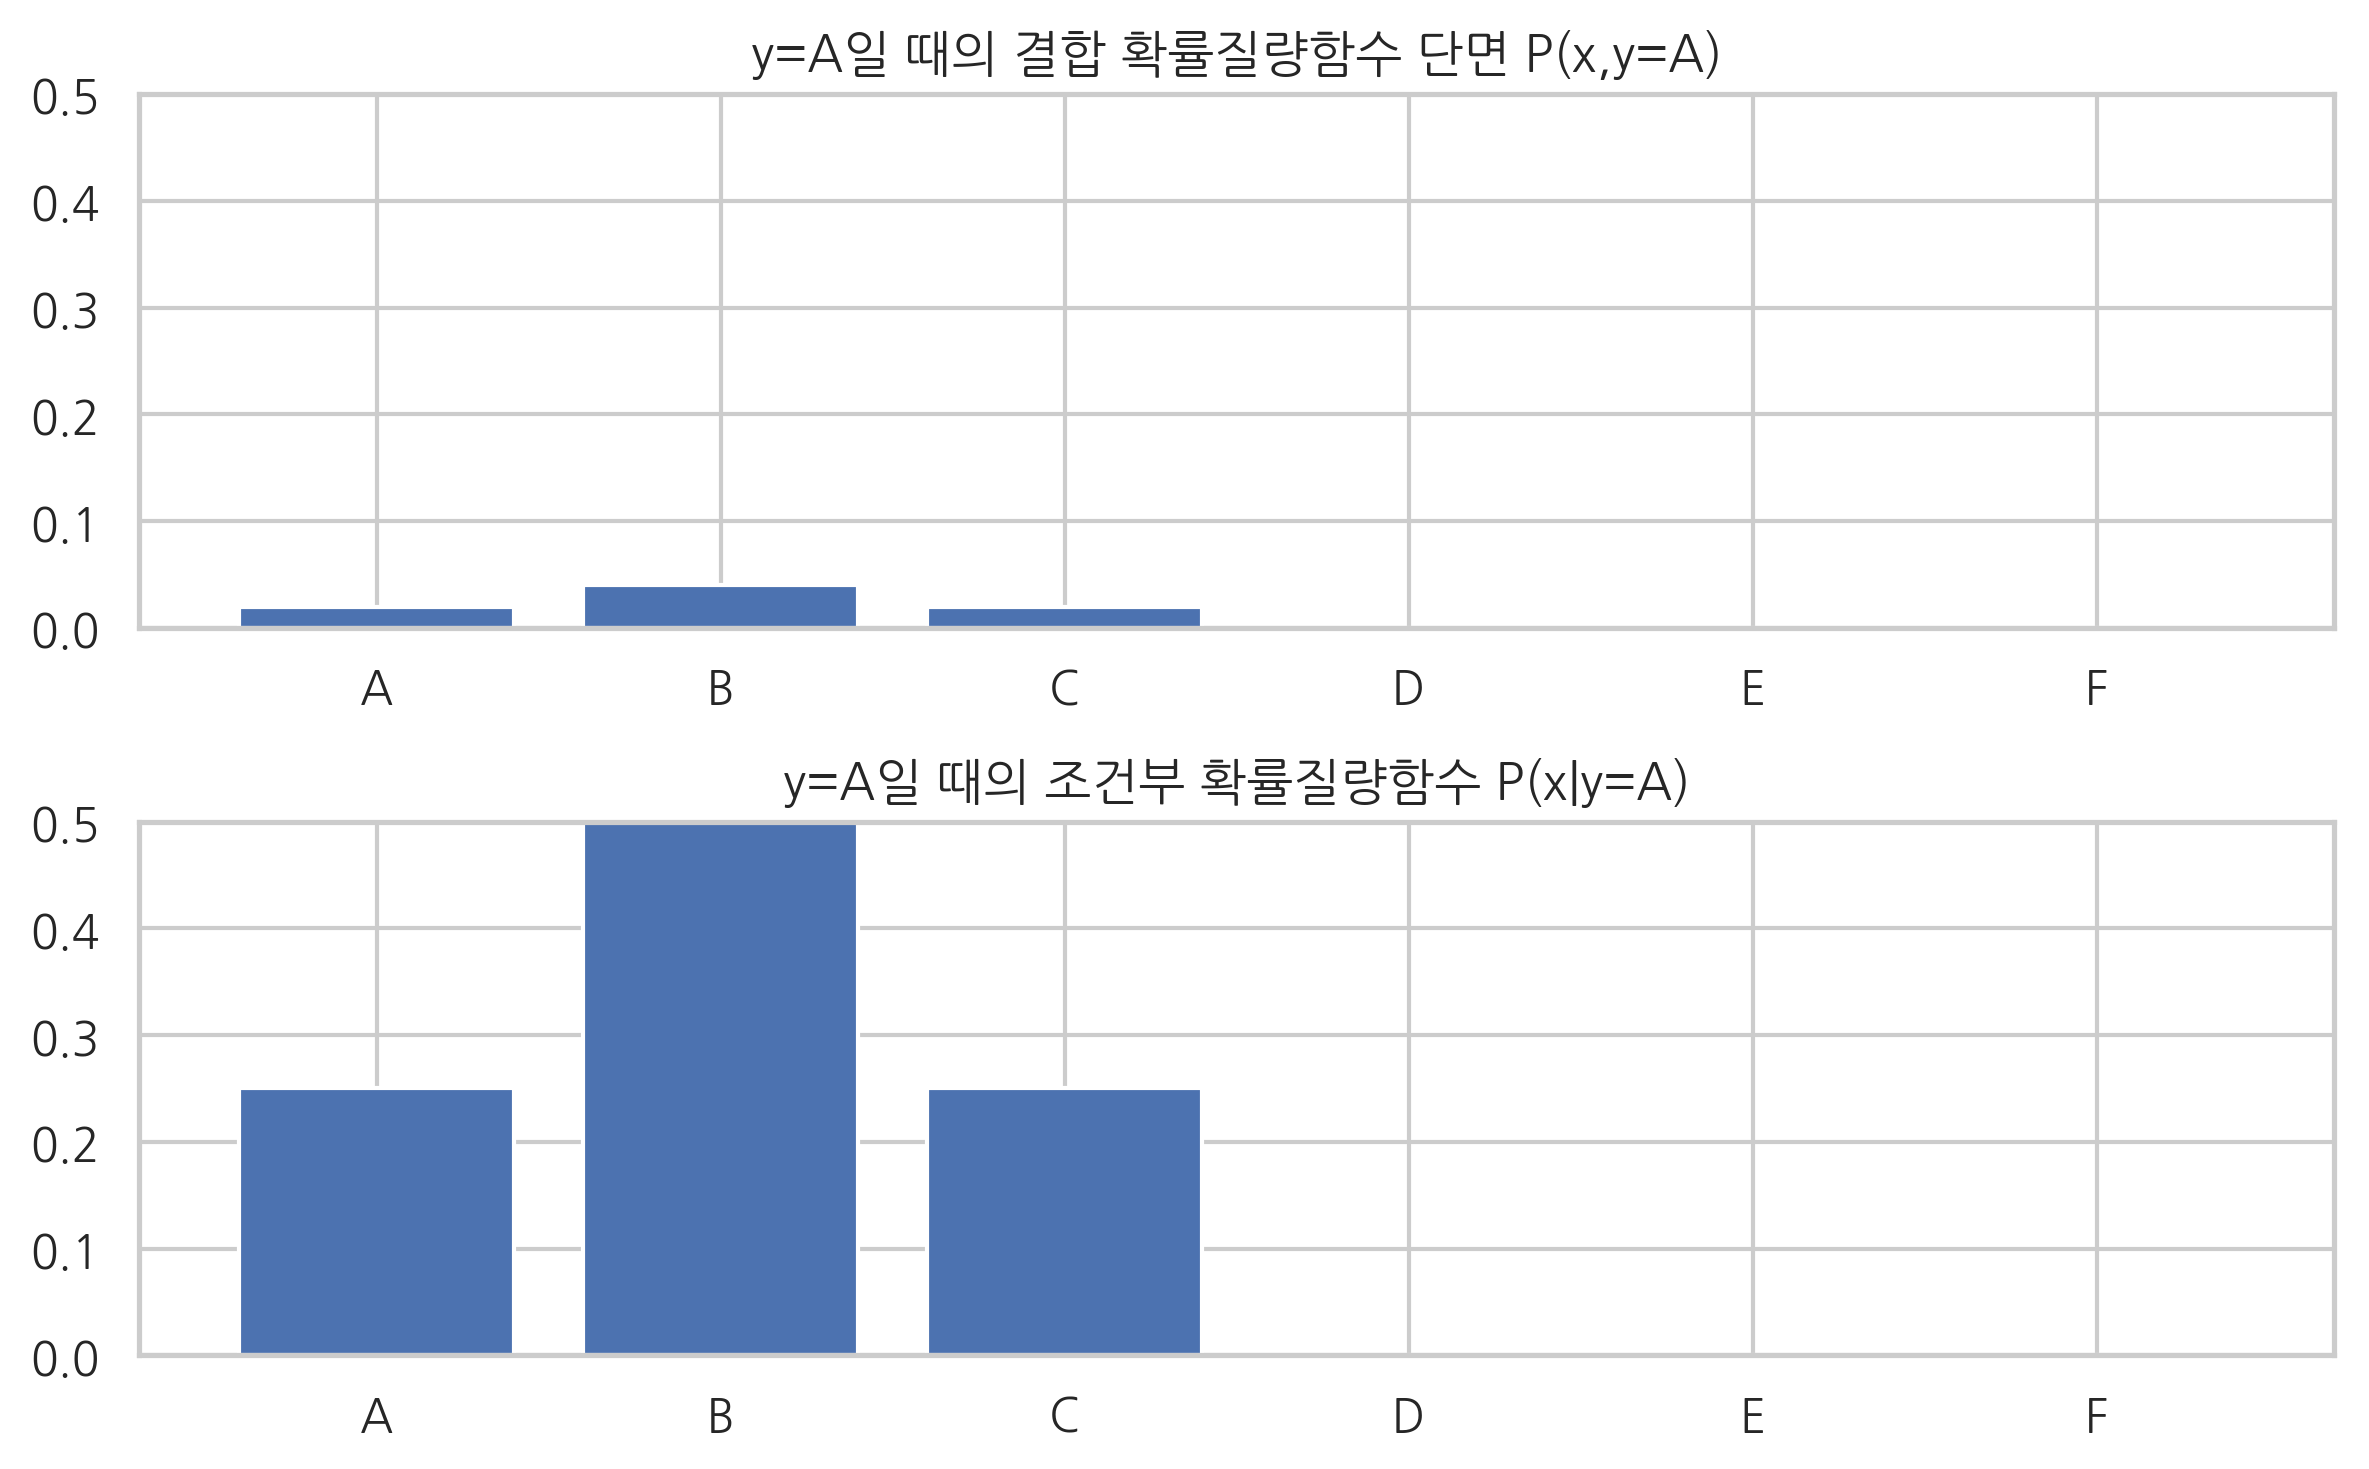

In [11]:
plt.subplot(211)
plt.bar(x, pmf[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 결합 확률질량함수 단면 P(x,y=A)")
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=A일 때의 조건부 확률질량함수 P(x|y=A)")
plt.tight_layout()
plt.show()

$y=B$일 때의 결합확률질량함수의 단면과 확률의 합은 다음과 같다.

In [12]:
pmf[1, :]

array([0.  , 0.04, 0.06, 0.02, 0.  , 0.  ])

In [13]:
np.sum(pmf[1, :])

0.12000000000000001

$y=B$일 때의 조건부 확률질량함수와 확률의 합은 다음과 같다.

In [14]:
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
cond_y1

array([0.        , 0.33333333, 0.5       , 0.16666667, 0.        ,
       0.        ])

In [15]:
np.sum(cond_y1)

0.9999999999999999

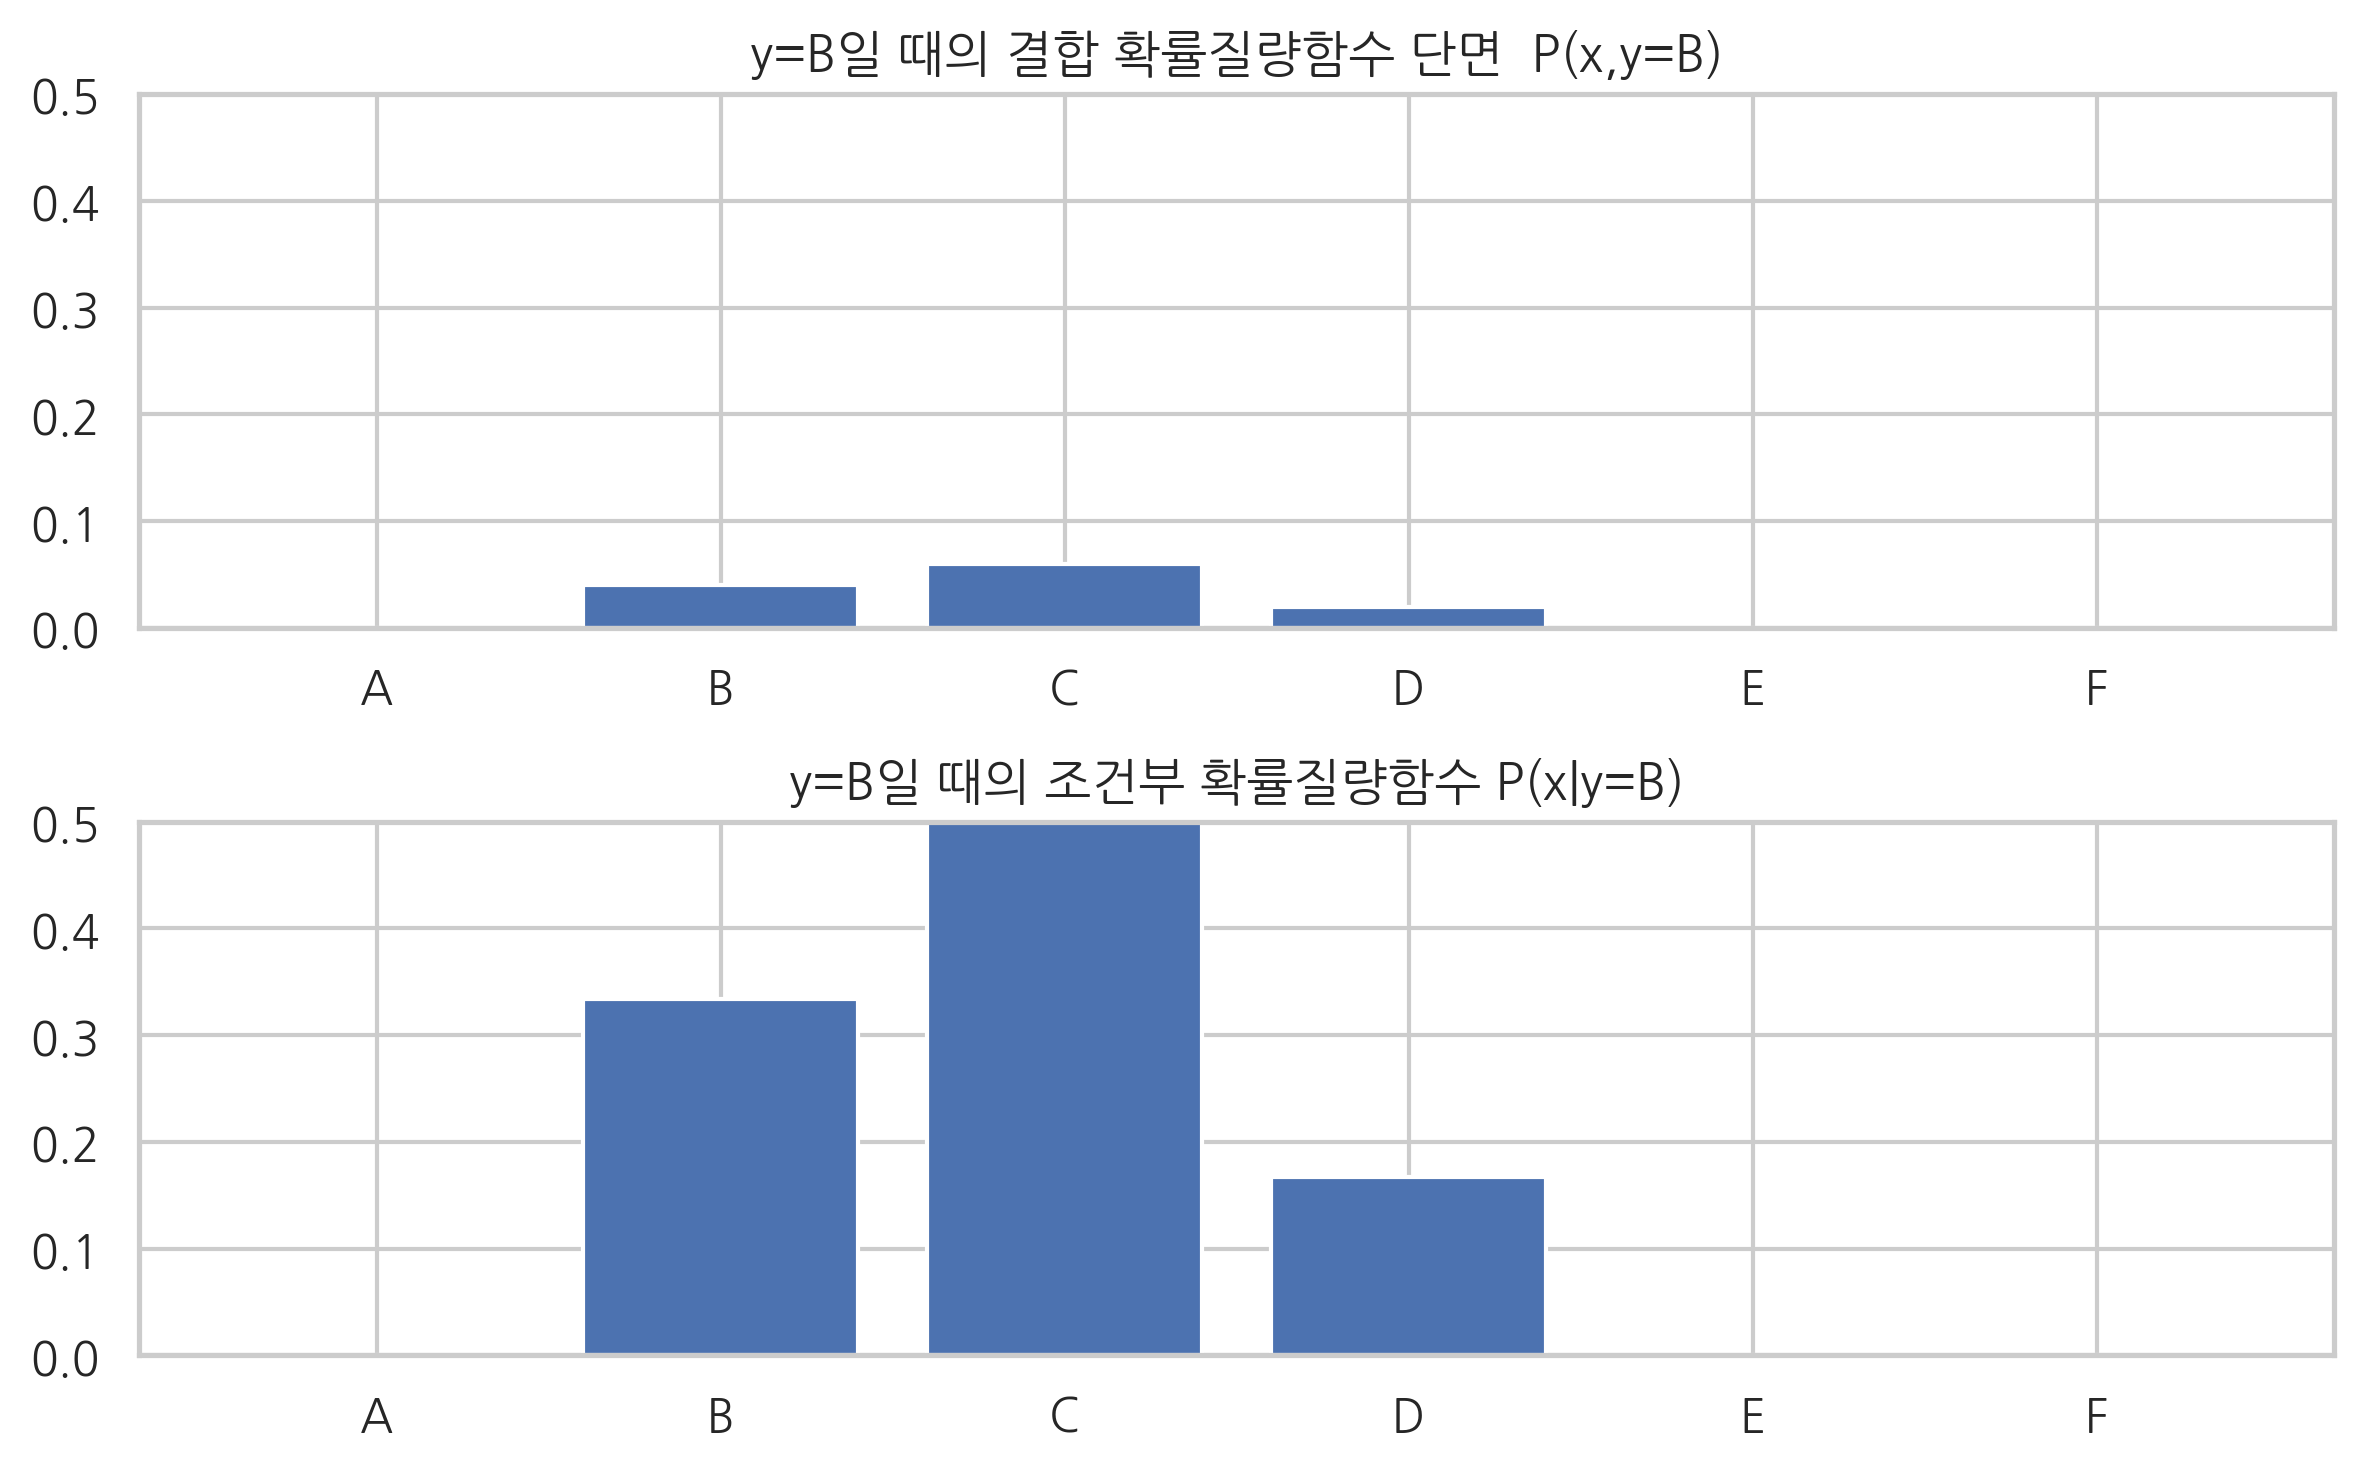

In [16]:
y = np.arange(6)
plt.subplot(211)
plt.bar(y, pmf[1, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 결합 확률질량함수 단면  P(x,y=B)")
plt.subplot(212)
plt.bar(y, cond_y1)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("y=B일 때의 조건부 확률질량함수 P(x|y=B)")
plt.tight_layout()
plt.show()